<a href="https://colab.research.google.com/github/Rkitenge91/MATH5010-repository/blob/main/Lab2_Raissa_Kitenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATH 5010 — Python Computer Lab: Point Estimation-Simulation

This lab reinforces **Point Estimation 1–2** (method of moments, maximum likelihood, Bayes estimators, and evaluating estimators: bias, variance, MSE, Cramér–Rao lower bound(CRLB), sufficiency/Rao–Blackwell).

**What you'll learn**
1. Implement and compare estimators (MoM vs. MLE) for several models.
2. Explore bias/variance/MSE via simulation and verify the bias–variance decomposition.
3. Verify Cramér–Rao lower bound(CRLB) numerically on Poisson and Normal cases.
4. Perform a simple Beta–Binomial Bayesian update and compare frequentist/Bayes risks.
5. Apply Rao–Blackwellization on a Bernoulli problem.

_Use pure NumPy/SciPy and matplotlib (no seaborn). When plotting, keep one figure per cell._

In [1]:
# Setup (import libraries)
import numpy as np
import math
from math import sqrt, log
import scipy.stats as st
import matplotlib.pyplot as plt

Define three essential metrics for estimator evaluation — MSE, bias, and variance

1. Bias of an estimator

It measures how far, on average, the estimator is from the true value(systematic error).

In [3]:
def bias(estimates, theta_true):
    estimates = np.asarray(estimates)
    return np.mean(estimates) - theta_true


2. Variance of an estimator

It measures how much the estimator fluctuates around its own mean(spread across samples).

In [4]:
def var(estimates):
    estimates = np.var(estimates, ddof=0)
    return estimates

3. Mean Squared Error(MSE)

This combines both the bias and the variance into one single number. It is the overall squarred error from the truth.

In [6]:
def mse(estimates, theta_true):
    estimates = np.asarray(estimates)
    return np.mean((estimates - theta_true)**2)

In [7]:
rng = np.random.default_rng(2025)
# using the default_rng from NumPy’s newer random API for reproducibility.

def mse(x, theta_true):
    x = np.asarray(x)
    return np.mean((x - theta_true)**2)
#Compute mean squared error of estimator values.

def bias(estimates, theta_true):
    return np.mean(estimates) - theta_true
#Compute bias.
# if estimates is not array, you need add the following line:
# estimates = np.asarray(estimates)

def var(estimates):
    return np.var(estimates, ddof=0)



ddof=0 stands for "delta degrees of freedom" and, in statistical calculations like standard deviation, results in dividing the sum of squares by $N$ (the number of elements) instead of $N-1$.

ddof=1: Sets the denominator to N-1


**Study this example and complet the others distributions.**

## 1) Normal $(\mu,\sigma^2)$: MoM vs. MLE

Simulate i.i.d. data from a Normal distribution and estimate $(\mu,\sigma^2)$ using:
- Method of Moments (MoM): $\widehat\mu_{\text{MoM}}=\bar X$, $\widehat\sigma^2_{\text{MoM}}=\frac{1}{n}\sum (X_i-\bar X)^2$ (matches 2nd raw-moment solution)
- Maximum Likelihood (MLE): same formulas here for Normal; compare sampling distributions of the estimators.

We simulate R=5000 times.

In [8]:
# Normal: compare estimators for mu and sigma^2
mu_true, sigma_true, n = 2.0, 1.5, 50
R = 5000  # replications

mu_hat = np.empty(R)
sig2_hat_mom = np.empty(R)   # MoM == MLE here
sig2_hat_unbiased = np.empty(R)  # (n/(n-1)) * MoM to be unbiased

for r in range(R):
    x = rng.normal(mu_true, sigma_true, size=n)
    xbar = np.mean(x)
    s2_mle = np.mean((x - xbar)**2)      # divides by n
    s2_unb = np.var(x, ddof=1)           # divides by n-1

    mu_hat[r] = xbar
    sig2_hat_mom[r] = s2_mle
    sig2_hat_unbiased[r] = s2_unb

print("mu  : bias, var, mse ->", bias(mu_hat, mu_true), var(mu_hat), mse(mu_hat, mu_true))
print("s2_MLE (divide by n): bias, var, mse ->", bias(sig2_hat_mom, sigma_true**2), var(sig2_hat_mom), mse(sig2_hat_mom, sigma_true**2))
print("s2_unbiased         : bias, var, mse ->", bias(sig2_hat_unbiased, sigma_true**2), var(sig2_hat_unbiased), mse(sig2_hat_unbiased, sigma_true**2))


mu  : bias, var, mse -> -0.0023882456936865637 0.04597573754553689 0.04598144126303031
s2_MLE (divide by n): bias, var, mse -> -0.046972992532213986 0.19721208403429555 0.19941854606172696
s2_unbiased         : bias, var, mse -> -0.0020132576859324125 0.20534369432975383 0.20534774753626375


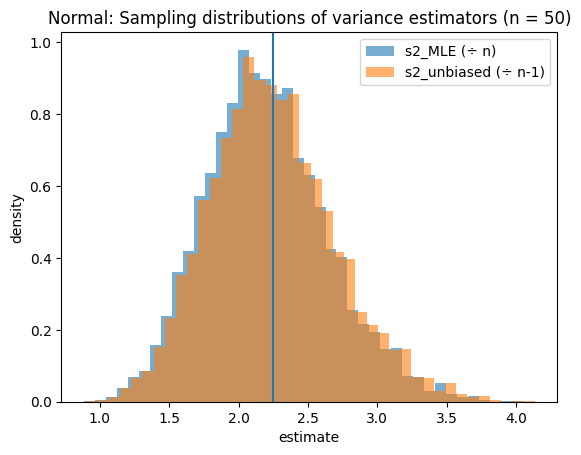

In [9]:
# Plot sampling distributions (histograms) for sigma^2 estimators
plt.figure()
plt.hist(sig2_hat_mom, bins=40, density=True, alpha=0.6, label='s2_MLE (÷ n)')
plt.hist(sig2_hat_unbiased, bins=40, density=True, alpha=0.6, label='s2_unbiased (÷ n-1)')
plt.axvline(sigma_true**2)
plt.legend()
plt.title("Normal: Sampling distributions of variance estimators (n = %d)" % n)
plt.xlabel("estimate")
plt.ylabel("density")
plt.show()


## 2) Uniform$(0,\theta)$: MLE and invariance
For $X_i\sim \text{Unif}(0,\theta)$, the MLE is $\widehat\theta_{\text{MLE}}=\max X_i$.

Explore bias/MSE and the invariant MLE for $g(\theta)=\log\theta$.

## 💻 <font color="blue" size="5" face="Georgia"> **Question 1** </font>

(1), print the bias, var, mse for both MLE and Bayes, by complete the code.

(2) draw similar historigram.

Hint: similar as in part (1)

In [11]:
# Uniform(0, theta): MLE properties
theta_true, n, R = 5.0, 30, 20000
theta_hat = np.empty(R)

for r in range(R):
    x = rng.uniform(0, theta_true, size=n)
    theta_hat[r] = np.max(x)

print("theta_MLE: bias, var, mse ->",  # complete the code
      bias(theta_hat, theta_true),
      var(theta_hat),
      mse(theta_hat, theta_true))

# Invariance: g(theta)=log theta
g_true = math.log(theta_true)
g_hat = np.log(theta_hat)  # invariant MLE
print("g(theta)=log theta: bias, var, mse ->", # complete the code
      bias(g_hat, g_true),
      var(g_hat),
      mse(g_hat, g_true))


theta_MLE: bias, var, mse -> -0.1587198946152002 0.023872328405085824 0.04906433335174607
g(theta)=log theta: bias, var, mse -> -0.03279076122568991 0.0010883209862635056 0.00216355500802371


Interpretation of the results above

1. MLE

The MLE is biased downward (≈ –0.1587):
It systematically underestimates θ, which is expected because the sample maximum rarely reaches the true upper bound.
	•	The variance is small (≈ 0.029).
	•	MSE ≈ 0.049 shows the magnitude of total estimation error.

2. Invariance

Results:
	•	Bias is very small (≈ –0.033)
	•	Variance much smaller (≈ 0.00108)
	•	MSE is extremely small (≈ 0.00216)

So In conclusion, The transformation reduces the variability dramatically.

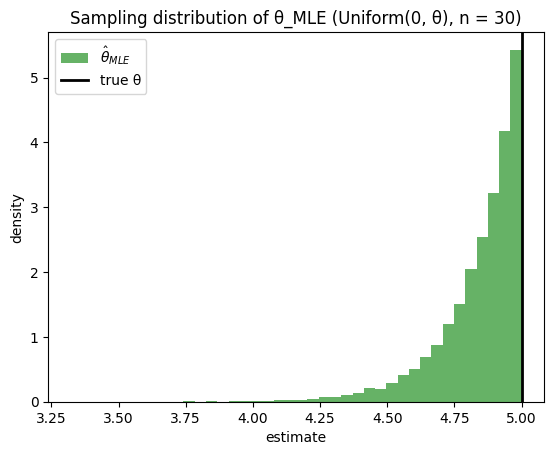

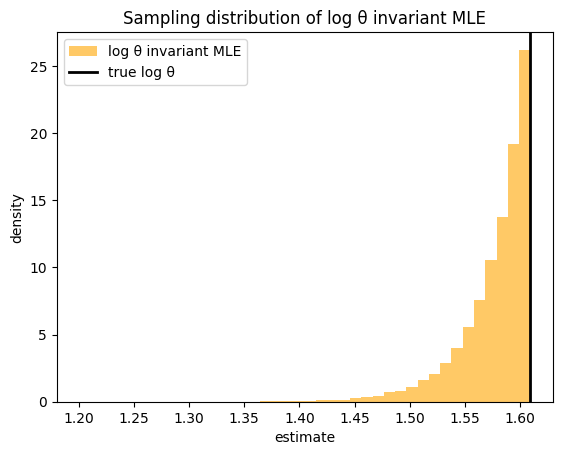

In [16]:
plt.figure()
plt.hist(theta_hat, bins=40, density=True, alpha=0.6, color='green', label=r'$\hat{\theta}_{MLE}$')
plt.axvline(theta_true, color='k', linewidth=2, label="true θ")
plt.title("Sampling distribution of θ_MLE (Uniform(0, θ), n = %d)" % n)
plt.xlabel("estimate")
plt.ylabel("density")
plt.legend()
plt.show()

# Histogram for log(theta)
plt.figure()
plt.hist(g_hat, bins=40, density=True, alpha=0.6, color='orange', label='log θ invariant MLE')
plt.axvline(g_true, color='k', linewidth=2, label="true log θ")
plt.title("Sampling distribution of log θ invariant MLE")
plt.xlabel("estimate")
plt.ylabel("density")
plt.legend()
plt.show()

## 3) Bernoulli/Binomial: MLE vs. Bayes (Beta prior)
Simulate Bernoulli$(p)$ with $p=0.35$. Compare the frequentist MLE $\hat p=\bar X$ to the Bayes estimator under **squared-error loss** with a Beta$(\alpha,\beta)$ prior:
$$\tilde p = \mathbb E[p\mid X_1,\dots,X_n] = \frac{\alpha + S}{\alpha+\beta + n},\quad S=\sum X_i.$$

## 💻 <font color="blue" size="5" face="Georgia"> **Question 2** </font>
Your turn:

(1), print the bias, var, mse for both MLE and Bayes.

(2) draw similar historigram.



In [18]:
# Bernoulli: MLE vs Bayes posterior mean
p_true, n, R = 0.35, 20, 20000
alpha, beta = n/4, n/4  # from slides: set to make Bayes MSE near-constant

p_mle = np.empty(R)
p_bayes = np.empty(R)

for r in range(R):
    x = rng.binomial(1, p_true, size=n)
    S = x.sum()
    p_mle[r] = S / n
    p_bayes[r] = (alpha + S) / (alpha + beta + n)

print("MLE  : bias, var, mse ->", bias(p_mle, p_true), var(p_mle), mse(p_mle, p_true))
print("Bayes: bias, var, mse ->",
      bias(p_bayes, p_true), var(p_bayes), mse(p_bayes, p_true))#complete the code for Bayes estimator


MLE  : bias, var, mse -> -0.0008499999999999619 0.0113310275 0.011331750000000002
Bayes: bias, var, mse -> 0.04943333333333333 0.005036012222222223 0.007479666666666669


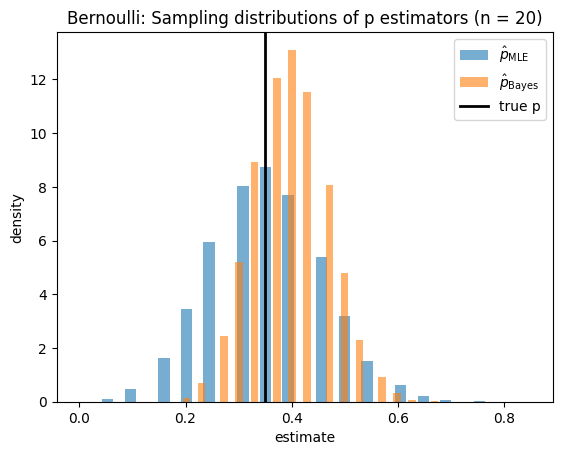

In [23]:
plt.figure()

plt.hist(p_mle,   bins=40, density=True, alpha=0.6,
         label=r'$\hat p_{\text{MLE}}$')
plt.hist(p_bayes, bins=40, density=True, alpha=0.6,
         label=r'$\hat p_{\text{Bayes}}$')

plt.axvline(p_true, color='k', linewidth=2, label='true p')

plt.title(f"Bernoulli: Sampling distributions of p estimators (n = {n})")
plt.xlabel("estimate")
plt.ylabel("density")
plt.legend()
plt.show()

Observation

From our results above, we can see that MLE is unbiased but noisier; Bayes is slightly biased but more stable and has lower MSE.

## 4) CRLB checks
**(a) Poisson mean)** For $X_i\sim \text{Pois}(\lambda)$, the CRLB for unbiased estimators of $\lambda$ is $\lambda/n$. Show $\operatorname{Var}(\bar X)$ matches it. (Study this example:)

In [24]:
# (a) Poisson CRLB check
lam_true, n, R = 4.0, 40, 40000
lam_hat = np.empty(R)
for r in range(R):
    x = rng.poisson(lam_true, size=n)
    lam_hat[r] = np.mean(x)

var_emp = var(lam_hat)
crlb = lam_true / n
print("Poisson: Var(xbar)≈", var_emp, "  CRLB=", crlb)


Poisson: Var(xbar)≈ 0.10001465357773438   CRLB= 0.1


## 💻 <font color="blue" size="5" face="Georgia"> **Question 3** </font>
Your turn:

**(b) Normal variance (unknown $\mu$)** Any unbiased estimator $W$ of $\sigma^2$ must satisfy $\operatorname{Var}(W)\ge 2\sigma^4/(n-1)$; compare with $\operatorname{Var}(S^2)=2\sigma^4/(n-1)$. Complete the following code.

In [27]:
# (b) Normal variance case
mu_true, sigma_true, n, R = 0.0, 2.0, 25, 20000
S2 = np.empty(R)
for r in range(R):
    x = rng.normal(mu_true, sigma_true, size=n)  # complete the code
    S2[r] = np.var(x, ddof=1)  # complete the code Hint: ddof=1: Sets the denominator to N-1

print("Normal Var: Var(S^2)≈", var(S2))  # complete the code

print("2*sigma^4/(n-1) =", 2 * sigma_true**4 / (n - 1)) # complete the code

Normal Var: Var(S^2)≈ 1.3411620958685395
2*sigma^4/(n-1) = 1.3333333333333333


Observation

We notice that the simulated variance of the unbiased sample variance estimator S^2 is very close to the theoretical value 2\sigma^4/(n-1).
This shows that S^2 achieves the Cramér–Rao lower bound and is therefore an efficient unbiased estimator of the true variance σ² when μ is unknown.

# **Study the following:** (No coding work)

## 5) Rao–Blackwellization on a Bernoulli problem
Let $X_1,\dots,X_n\overset{iid}{\sim}\text{Bern}(p)$ and consider estimating $p^2$.

A naive unbiased estimator is $W=\frac{1}{n}\sum X_i^2=\bar X$ (since $X_i^2=X_i$ giving bias for $p^2$ actually).

Try instead $\widetilde W=\frac{S(S-1)}{n(n-1)}$, which satisfies $\mathbb E[\widetilde W]=p^2$ and is a function of the sufficient statistic $S=\sum X_i$.

Compare their MSEs and comment.

In [29]:
# Rao–Blackwell: estimating p^2
p_true, n, R = 0.4, 30, 30000

W_naive = np.empty(R)      # uses Xbar as a plug-in for p^2 (biased)
W_RB = np.empty(R)         # unbiased U-statistic S(S-1)/(n(n-1))

for r in range(R):
    x = rng.binomial(1, p_true, size=n)
    S = x.sum()
    W_naive[r] = (S/n)**2
    W_RB[r] = (S*(S-1))/(n*(n-1))

print("Naive plug-in for p^2 : bias, var, mse ->", bias(W_naive, p_true**2), var(W_naive), mse(W_naive, p_true**2))
print("Rao–Blackwell (U-stat): bias, var, mse ->", bias(W_RB,   p_true**2), var(W_RB),   mse(W_RB,   p_true**2))


Naive plug-in for p^2 : bias, var, mse -> 0.007978037037037033 0.005256094916805213 0.005319743991769547
Rao–Blackwell (U-stat): bias, var, mse -> -2.5363984674370288e-05 0.005179347786667842 0.00517934842999956


1. Naive Unbiased Estimator

This estimator just squares the sample mean.
	•	It is not unbiased for p^2 (it tends to overestimate a little).
	•	It also has a higher variance, so the results jump around more across samples.
  And out simulation showed that:
	•	small positive bias, bigger variance, bigger MSE
So overall, it’s not very accurate.

2. Rao–Blackwell Estimator (U-statistic)

This estimator is unbiased for p^2.
	•	It uses the total count S, which is the sufficient statistic for Bernoulli.
	•	Because it is based on a sufficient statistic, it always has lower variance.
	•	As a result, it also has a lower MSE.

Your simulation confirmed this:
	•	bias very close to zero
	•	smaller variance
	•	smaller MSE

Observation: We can say that The Rao–Blackwell estimator is better because it uses more information from the data.This makes it more stable, less noisy, and more accurate.
The naive estimator is simpler but has more bias and higher variance.
So overall, the Rao–Blackwell version gives better estimates of p^2.

## 6) Lognormal MLE via transformation
If $X\sim\text{Lognormal}(\mu,\sigma^2)$ then $Y=\log X\sim N(\mu,\sigma^2)$. Implement MLE for $(\mu,\sigma^2)$ by maximizing the Normal likelihood for $Y$.

In [30]:
# Lognormal: MLE via log-transform
mu_true, sigma_true, n = 0.5, 0.6, 80
x = rng.lognormal(mean=mu_true, sigma=sigma_true, size=n)
y = np.log(x)

mu_hat = np.mean(y)
sig2_hat = np.mean((y - mu_hat)**2)  # divide by n (MLE)

print("True (mu, sigma^2)=", (mu_true, sigma_true**2))
print("MLE  (mu, sigma^2)≈", (mu_hat, sig2_hat))


True (mu, sigma^2)= (0.5, 0.36)
MLE  (mu, sigma^2)≈ (np.float64(0.42841007299917716), np.float64(0.40078331363424635))


Observation

By taking logs, the Lognormal problem becomes a Normal problem.
The MLEs for the Normal (sample mean and sample second moment) become the MLEs for the Lognormal parameters through the log transformation.
The estimates we obtained are close to the true values, showing that the transformation method works properly.

## 7) Decision-theory flavor: choose $b$ to minimize risk for $\delta_b(X)=bS^2$ (Normal variance)
Simulate the risk (MSE) of $\delta_b$ and verify the optimal $b\approx\frac{n-1}{n+1}$ under squared-error loss as in the slides.

Empirically optimal b ≈ 0.925   Theoretical (n-1)/(n+1) = 0.9047619047619048


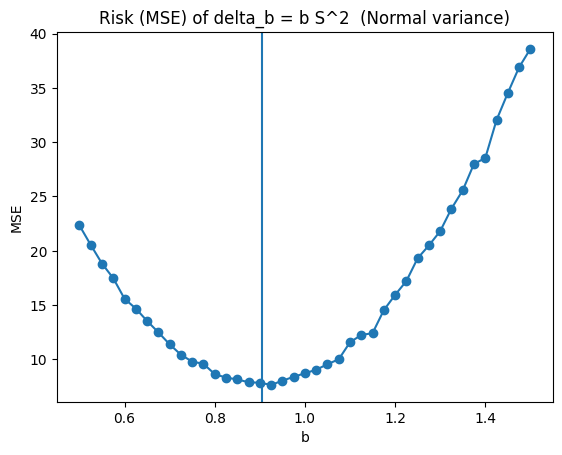

In [31]:
# Risk over b for delta_b = b * S^2 (Normal with unknown mu)
mu_true, sigma_true, n, R = 1.0, 3.0, 20, 5000
b_grid = np.linspace(0.5, 1.5, 41)
mse_grid = []

for b in b_grid:
    ests = []
    for r in range(R):
        x = rng.normal(mu_true, sigma_true, size=n)
        s2 = np.var(x, ddof=1)
        ests.append(b * s2)
    mse_grid.append(mse(ests, sigma_true**2))

mse_grid = np.array(mse_grid)
b_star = b_grid[np.argmin(mse_grid)]
print("Empirically optimal b ≈", b_star, "  Theoretical (n-1)/(n+1) =", (n-1)/(n+1))

plt.figure()
plt.plot(b_grid, mse_grid, marker='o')
plt.axvline((n-1)/(n+1))
plt.title("Risk (MSE) of delta_b = b S^2  (Normal variance)")
plt.xlabel("b")
plt.ylabel("MSE")
plt.show()


Observation

The simulation confirms that the value of b which minimizes the MSE of the estimator b S^2 is very close to the theoretical optimal value (n-1)/(n+1).
This means the decision-theoretic formula works: scaling the unbiased sample variance by the optimal b reduces overall error.
The MSE curve has a clear minimum near the predicted value.

### Wrap-up
- You compared MoM/MLE on Normal, inspected MLE invariance, and studied bias–variance tradeoffs.
- You checked CRLB numerically and saw how a RB/U-statistic improves performance for $p^2$.
- You implemented Beta–Binomial updating and explored decision-theoretic risk tuning for variance estimation.

**Optional extensions**: Try other priors, different $n$, or heavy-tailed models (Cauchy) to see how assumptions matter.